In [11]:
options(jupyter.rich_display=FALSE)

# Problem 1: The SIR model for epidemics

**Scoring**: Each part is 10 points, 50 points total.

The SIR (susceptible-infected-recovered) model is the fundamental model for understanding how infectious diseases spread in a community. In this model, the population is broken into three groups:

- Susceptible (S): Healthy, but can catch the disease by contact with an infected person.
- Infected (I): Infected by the disease, and can infect others.
- Recovered (R): Has completely recovered from the disease, cannot infect others, and has permanent immunity (does not get infected again).

The number of people in each group changes every day as the disease spreads (typically, the number of susceptibles goes down, number of infected goes first up then down, number of recovered goes up).

We use the symbols $S_t$, $I_t$, and $R_t$ to indicate the number of people in each group at day $t$. The whole population has $N$ people, which we assume is constant (nobody dies or is born during the time we observe). The SIR model assumes that these numbers change every day according to the following equations:

\begin{align}
S_{t+1} &= S_t - \beta \frac{S_tI_t}{N} \\
I_{t+1} &= I_t + \beta \frac{S_tI_t}{N} - \gamma I_t \\
R_{t+1} &= R_t + \gamma I_t
\end{align}

Here $\beta$ and $\gamma$ are parameters of the model. The parameter $\beta$ can be interpreted as the likelihood that a susceptible person catches the disease at each contact with any other person within one day. The parameter $\gamma$ gives the recovery rate; that is, the fraction of infected people who recover every day.

**(A)** Write a function sir_step(S,I,R,beta,gamma) that takes the values $S_t$, $I_t$, $R_t$ at a given time, along with the model parameters $\beta$, $\gamma$, and returns the next set of values $S_{t+1}$, $I_{t+1}$, $R_{t+1}$ as a vector. The total number of people stays the same at each step, and does not have to be given separately.

The function should round the resulting values to the nearest integer.

Example: Suppose in a given day, there are 4 infected people among 10000 and no recovered people (start of the epidemic). Suppose $\beta$=2 and $\gamma$=0.5.

```r
> sir_step(S=9996, I=4, R=0, beta=2, gamma=0.5)
[1] 9988 10 2
```

This tells us that in the next day there are 9988 susceptible people, 10 infected people and 2 recovered people.

In [16]:
sir_step <- function(S, I, R, beta, gamma) {
    b_val <- beta*((S*I)/(S+I+R))
    g_val <- gamma*I
    return(round(c(S - b_val,
                   I + b_val - g_val,
                   R + g_val)))
}

sir_step(S=9996, I=4, R=0, beta=2, gamma=0.5)

[1] 9988   10    2

**(B)** Write a function `sir_sim(S0, I0, R0, beta, gamma, periods)` which simulates the SIR model for a specified number of periods (e.g., several days). The input parameters are the initial number of susceptibles `S0`, infected `I0`, and recovered `R0`, along with the model parameters `beta` and `gamma`. The function should change the population numbers at every step (you can use the `sir_step` function), and return a list of vectors storing the populations of each group. The list elements should be named `"S"`, `"I"`, and `"R"` as appropriate.

*Example*: Simulate the model for five days:

```r
> sir_sim(S=9996, I=4, R=0, beta=2, gamma=0.5, periods=5)
$S
[1] 9996 9988 9968 9918 9795 9493

$I
[1]   4  10  25  62 154 379

$R
[1]   0   2   7  20  51 128
```

Note that each output vector has `periods+1` elements, because the initial values are set at position 1.

In [17]:
sir_sim <- function(S0, I0, R0, beta, gamma, periods) {
    current <- c(S0, I0, R0)
    sim <- list(S=S0, I=I0, R=R0)
    for(period in 1:periods) {
        current <- sir_step(current[1], current[2], current[3], beta, gamma)
        sim <- list(S=c(sim$S, current[1]), I=c(sim$I, current[2]), R=c(sim$R, current[3]))
    }
    return(sim)
}

sir_sim(S=9996, I=4, R=0, beta=2, gamma=0.5, periods=5)

$S
[1] 9996 9988 9968 9918 9795 9493

$I
[1]   4  10  25  62 154 379

$R
[1]   0   2   7  20  51 128


In [20]:
# Another solution

sir_sim <- function(S0, I0, R0, beta, gamma, periods) {
    sirs <- c(S0, I0, R0)
    for(p in 0:periods-1) {
        sirs <- c(sirs, sir_step(sirs[p*3+1], sirs[p*3+2], sirs[p*3+3], beta, gamma))
    }
    return(list(S=sirs[c(T,F,F)], I=sirs[c(F,T,F)], R=sirs[c(F,F,T)]))
}

sir_sim(S=9996, I=4, R=0, beta=2, gamma=0.5, periods=5)

$S
[1] 9996 9988 9968 9918 9795 9493

$I
[1]   4  10  25  62 154 379

$R
[1]   0   2   7  20  51 128


**(C)** Write a function named `plot_infected(S0, I0, R0, beta, gamma, periods)` that plots the number of infected people as a function of time. The input parameters are the same as in the previous part. The function does not return a value, but generates a plot as shown below.

Generate the following plot:

```r
> plot_infected(S0=9996, I0=4, R0=0, beta=1, gamma=0.5, periods = 50)
```
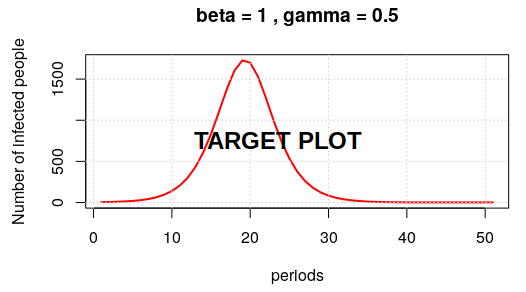

Replicate the plot title, axis labels, colors, grid and legend as well. Do not add the text "TARGET PLOT". The aspect ratio (height/width) may vary. Set the line widths to 2.

Save the image with the name `as3-1-C.png` and **submit with your homework** (you will not get any points if you do not also upload the plot image).

Hint: Use the `paste()` function in the title, which combines text and numbers into a single string.

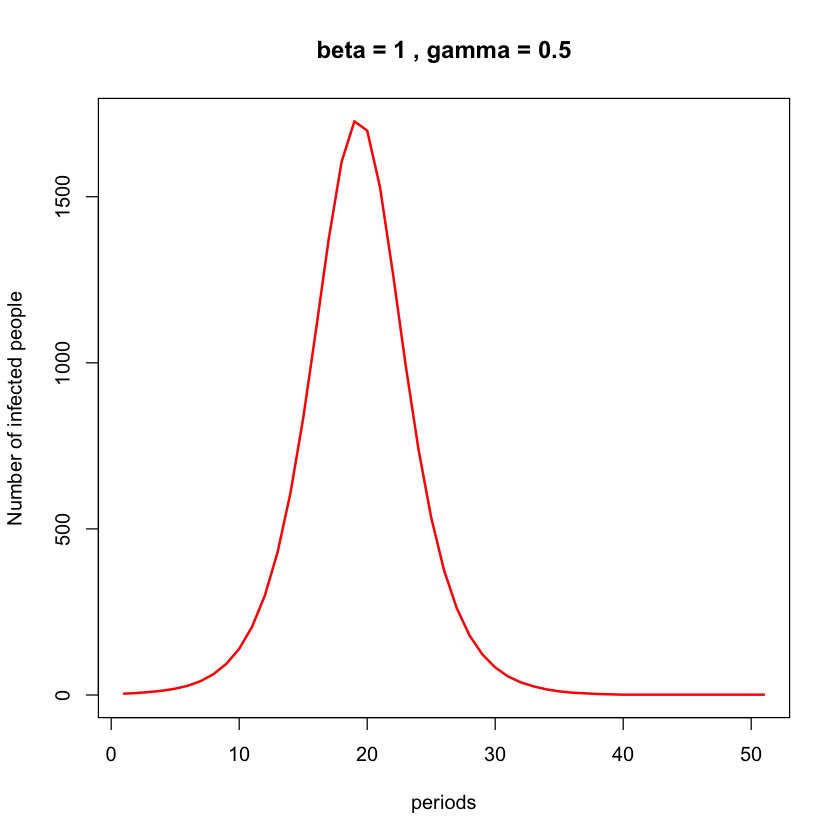

In [26]:
plot_infected <- function(S0, I0, R0, beta, gamma, periods) {
    plot(sir_sim(S0, I0, R0, beta, gamma, periods)$I,
         type='l', col='red', lwd=2,
         xlab="periods",
         ylab="Number of infected people",
         main=paste("beta =", beta, ", gamma =", gamma))
}

plot_infected(S0=9996, I0=4, R0=0, beta=1, gamma=0.5, periods = 50)

**(D)** The spread of the disease slows down when people keep their distance from each other, stay at home as much as possible, wash their hands and wear masks. This has the effect of reducing the $\beta$ parameter of the model.

To simulate the effect of social distancing and other precautions, write a function

`sir_sim_distancing(S0, I0, R0, beta, gamma, periods, distancing_start, distancing_end)`

that has the same input as the `sir_sim()` function you defined above. The parameters `distancing_start` and `distancing_end` indicate the periods when the beta parameter is **half of the original value**. The function should return a list of population vectors as described above, as well as the beta values at each step.

*Example*: The following function starts distancing after 2 days (at element 3) and continues until the 4th day (element 5, included). The beta value at steps 2 to 4 is $\beta$=1, half of the original value given as parameter.

```r
> sir_sim_distancing(S=9996, I=4, R=0, beta=2, gamma=0.5, periods=5,
                     distancing_start = 2, distancing_end = 4)
$S
[1] 9996 9988 9968 9943 9906 9852

$I
[1]  4 10 25 37 55 82

$R
[1]  0  2  7 20 38 66

$beta
[1] 2 2 1 1 1 2
```

In [63]:
sir_sim_distancing <- function(S0, I0, R0, beta, gamma, periods, distancing_start, distancing_end) {
    sim1 <- sir_sim(S0, I0, R0, beta, gamma, distancing_start)
    
    interval1 <- distancing_end - distancing_start + 1
    sim2 <- sir_sim(sim1$S[distancing_start + 1],
                    sim1$I[distancing_start + 1],
                    sim1$R[distancing_start + 1],
                    beta/2, gamma, interval1)
    
    interval2 <- periods - distancing_end - 1
    sim3 <- sir_sim(sim2$S[interval1 + 1],
                    sim2$I[interval1 + 1],
                    sim2$R[interval1 + 1],
                    beta, gamma, interval2)
    
    list(S=c(sim1$S, sim2$S[-1], sim3$S[-1]),
         I=c(sim1$I, sim2$I[-1], sim3$I[-1]),
         R=c(sim1$R, sim2$R[-1], sim3$R[-1]),
         beta=rep(c(beta, beta/2, beta), c(distancing_start, interval1, interval2+1)))
}

sir_sim_distancing(S0=9996, I0=4, R0=0, beta=2, gamma=0.5, periods=5,
                   distancing_start = 2, distancing_end = 4)

$S
[1] 9996 9988 9968 9943 9906 9852

$I
[1]  4 10 25 37 55 82

$R
[1]  0  2  7 20 38 66

$beta
[1] 2 2 1 1 1 2


**(E)** Using the `sir_sim()` and `sir_sim_distancing()` functions, compare the result of distancing against not taking any action at all. Write a function

`sir_sim_compare_infection(S0, I0, R0, beta, gamma, periods, distancing_start, distancing_end)`

that plots the numbers of **infected** people resulting from `sir_sim()` and `sir_sim_distancing()` functions together, as shown below. The function should not return any value.

Generate the following plot:

```r
> sir_sim_compare_infection(S0=9996, I0=4, R0=0, beta=0.5, gamma=0.1, periods = 100,
                          distancing_start = 20, distancing_end = 30)
```
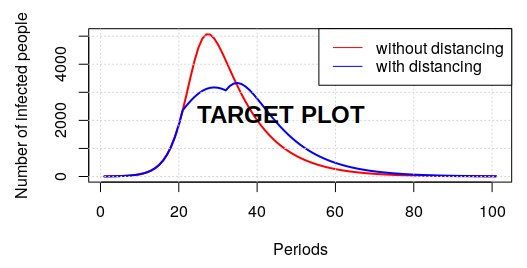

Replicate the plot with correct axis labels, colors, grid and legend. The aspect ratio (height/width) may vary. Set the line widths to 2. Do not add the text "TARGET PLOT". Upload the resulting image with the name as3-1-E.png. Plese note that you will not get any points if you do not submit the image file along with the code.

Hint: In the legend, use the `lty=1` setting.

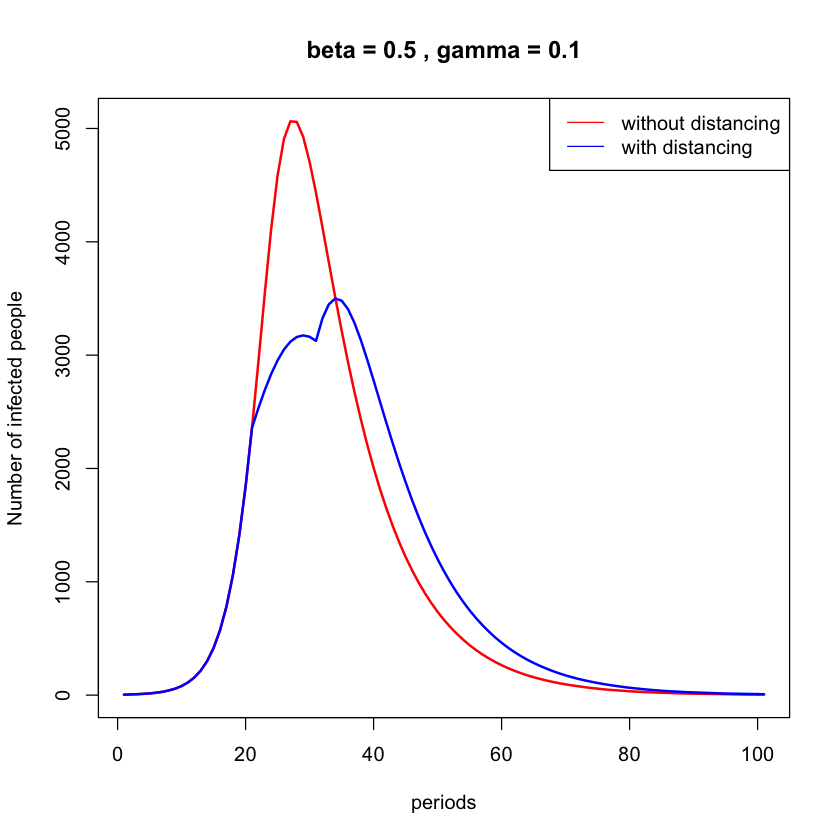

In [58]:
sir_sim_compare_infection <- function(S0, I0, R0, beta, gamma, periods, distancing_start, distancing_end) {
    plot_infected(S0, I0, R0, beta, gamma, periods)
    lines(sir_sim_distancing(S0, I0, R0, beta, gamma, periods, distancing_start, distancing_end)$I,
          col="blue", lwd=2)
    legend("topright", col=c("red", "blue"), lty=1,
           legend=c("without distancing", "with distancing"))
}

sir_sim_compare_infection(S0=9996, I0=4, R0=0, beta=0.5, gamma=0.1, periods = 100,
                          distancing_start = 20, distancing_end = 30)